<a href="https://colab.research.google.com/github/Jayani/CE888/blob/main/Lab_6/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
countries = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [53]:
features= countries.columns[1:]
X= countries[features]

In [54]:
k_means= cluster.KMeans(n_clusters= 3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

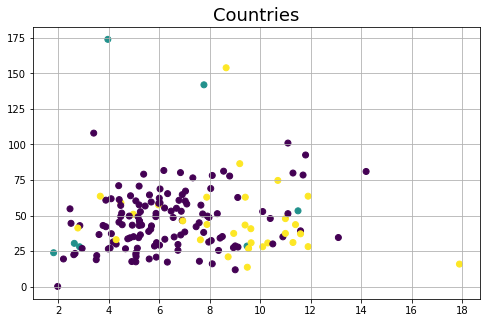

In [56]:
plt.figure(figsize=(8,5))
plt.title("Countries", fontsize=18)
plt.grid(True)
plt.scatter(X.iloc[:,2],X.iloc[:,3], c=k_means.labels_)
plt.savefig('Countries.png', dpi=300)
plt.show()

In [59]:
sc = StandardScaler()
X_sc= sc.fit_transform(X)

In [62]:
pca = PCA(n_components= 4)
X_pca = pca.fit_transform(X_sc)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162])

In [63]:
k_means= cluster.KMeans(n_clusters= 3)
k_means.fit(X_pca)
k_means.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

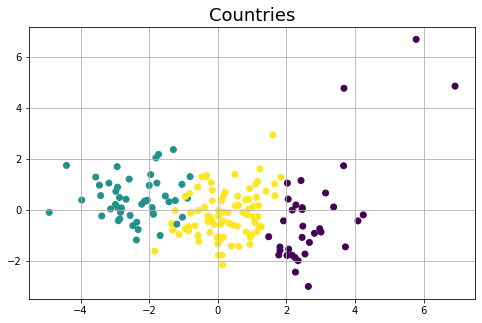

In [64]:
plt.figure(figsize=(8,5))
plt.title("Countries", fontsize=18)
plt.grid(True)
plt.scatter(X_pca[:,0],X_pca[:,1], c=k_means.labels_)
plt.savefig('Countries.png', dpi=300)
plt.show()

In [65]:
countries['Category']= k_means.labels_

In [66]:
countries.loc[countries['Category']==1, 'Country_Group']= 'Under Developing Country'
countries.loc[countries['Category']==2, 'Country_Group']= 'Developing Country'
countries.loc[countries['Category']==0, 'Country_Group']= 'Developed Country'

In [67]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Category,Country_Group
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,Under Developing Country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,Developing Country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,Developing Country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Under Developing Country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,Developing Country
